In [2]:
import numpy as np
def RWS(P,r):
    q = 0
    for i in range(1,len(P)+1):
        q += P[i-1]
        if r <=q:
            return i
        
def choice_by_RouletteWheel(P):
    choice_list ={}
    r_list = [0.450126, 0.110347, 0.572496, 0.98503]
    for j in range(len(P)):
        curr_choice = RWS(P,r_list[j])
        if curr_choice in choice_list:
            choice_list[curr_choice]+=1
        else:
            choice_list[curr_choice]=1
    result = {}
    for i in sorted(choice_list):
        result[i]=choice_list[i]
    return result
if __name__=='__main__':
    P = [0.14,0.49,0.06,0.31]
    choice_list = choice_by_RouletteWheel(P)
    print(choice_list)

{1: 1, 2: 2, 4: 1}


In [4]:
import time
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['font.sans-serif']=[u'SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
def distEclud(vecA,vecB):
    return np.sqrt(np.sum(np.power(vecA-vecB,2)))
def get_closest_dist(point,centroids):
    min_dist = np.inf
    for i,centroids in enumerate(centroids):
        dist = distEclud(np.array(centroids),np.array(point))
        if dist<min_dist:
            min_dist=dist
    return min_dist
def RWS(P,r):
    q = 0
    for i in range(len(P)):
        q+=P[i]
        if i == (len(P)-1):
            q = 1
        if r<=q:
            return i

        

In [5]:
def getCent(dataSet,k):
    n = dataSet.shape[1]
    m = dataSet.shape[0]
    centroids = np.mat(np.zeros((k,n)))
    index = np.random.randint(0,n,size=1)
    centroids[0,:]=dataSet[index,:]
    d = np.mat(np.zeros((m,1)))
    for j in range(1,k):
        for i in range(m):
            d[i,0]=get_closest_dist(dataSet[i],centroids)
        P = np.square(d)/np.square(d).sum()
        r = np.random.random()
        choice_index = RWS(P,r)
        centroids[j,:]=dataSet[choice_index]
    return centroids

In [9]:
def kMeans_plus2(dataSet,k,distMeas=distEclud):
    m = dataSet.shape[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroids = getCent(dataSet,k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged =True
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI<minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i,0]!=minIndex:
                clusterChanged=True
            clusterAssment[i,:]=minIndex,minDist**2
        print(centroids)
        for cent in range(k):
            pstClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]
            centroids[cent,:]=np.mean(pstClust,axis=0)
    return centroids,clusterAssment
def plotResult(myCentroids,clustAssing,X):
    centroids = myCentroids.A
    y_kmeans = clustAssing[:,0].A[:,0]
    plt.subplot(121)
    plt.scatter(X[:,0],X[:,1],s=50)
    plt.title('未聚类前的数据分布')
    plt.subplots_adjust(wspace=0.5)
    plt.subplot(122)
    plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='viridis')
    plt.scatter(centroids[:,0],centroids[:,1],c='red',s=100,alpha=0.5)
    plt.title('Kmeans ++')
    plt.show()

In [ ]:
def load_data_make_blobs():
    from sklearn.datasets import make_blobs
    k = 5
    X,Y = make_blobs(n_samples=1000,n_features=2,centers=k,random_state=1)
    return X,k
if __name__=='__main__':
    X,k=load_data_make_blobs()
    myCentroids, clustAssing = kMeans_plus2(X, k, distMeas=distEclud) # myCentroids为簇质心
    print("用K-Means++算法原理聚类耗时：", time.time() - s)
    plotResult(myCentroids, clustAssing, X)

[[ -7.23632337  -7.96629106]
 [-10.78851246  -2.72962634]
 [ -8.23746328  -4.01400104]
 [ -2.1769496    1.58045753]
 [ -2.38515703   3.53872119]]
[[ -7.04661073  -8.0459637 ]
 [-10.64955919  -3.52191385]
 [ -7.09418984  -3.46205128]
 [ -2.09214928   0.67549689]
 [ -1.64607699   4.4844345 ]]
[[ -7.07237115  -8.09026815]
 [-10.22058258  -3.89508824]
 [ -6.37072723  -3.13248166]
 [ -2.0891683    0.73944077]
 [ -1.56670999   4.4820293 ]]
[[ -7.05942132  -8.07760549]
 [-10.01575357  -3.91247296]
 [ -6.0992208   -3.0044604 ]
 [ -2.09250914   0.7492618 ]
 [ -1.56071015   4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.99022127 -3.90560463]
 [-6.06528603 -2.99760608]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.059

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.077

[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.90557712]
 [-6.05545461 -2.99288183]
 [-2.09250914  0.7492618 ]
 [-1.56071015  4.49091655]]
[[-7.05942132 -8.07760549]
 [-9.98028373 -3.9055

In [12]:
import time
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs
matplotlib.rcParams['font.sans-serif']=[u'SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
k = 5

X,y  = make_blobs(n_samples=1000,n_features=2,centers=k,random_state=1)
s = time.time()
km = MiniBatchKMeans(n_clusters=k,batch_size=100)
km.fit(X)
print(time.time()-s)

0.019646883010864258


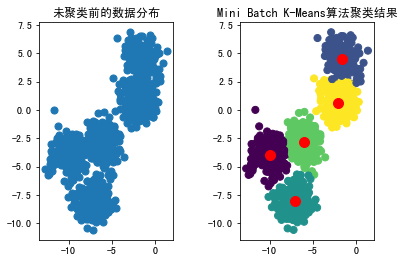

In [14]:
label_pred = km.labels_
centroids = km.cluster_centers_
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],s=50)
plt.title('未聚类前的数据分布')
plt.subplots_adjust(wspace=0.5)
plt.subplot(122)
plt.scatter(X[:,0],X[:,1],c=label_pred,s=50,cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='o',s=100)
plt.title("Mini Batch K-Means算法聚类结果")
plt.show()